# Michiel's cycling data Notebook

## Opening a .fit file, reading it into a Pandas dataframe and show some graphs 


## Contents

0. Install fitparse and import the python librarie
1. Import the .fit file and read into a pandas dataframe
2. Check the data
3. Clean the data
4. Show data in graphs
5. Some more data analysis, such as burned calories, total duration etc.
6. Store the data as a .json file

In sports technology the .fit file is a standard originally developed by Garmin but now used as an open standard. 
You can find the .fit file of your activity on your device or download it from your online account. 

Upload this .fit file to a Jupyter Notebook. In step 1 we will use this file.

### To do
- [ ] pandas df with rounded numbers
- [ ] optimize storage of json file

## 0. Install fitparse and import the python libraries

We use the fitparse library to parse the .fit file.

Please find the github of fitparse project here: http://dtcooper.github.io/python-fitparse/

In [2]:
!pip install fitparse 

  Created wheel for fitparse: filename=fitparse-1.1.0-py3-none-any.whl size=68287 sha256=8348ee4c888148a80de1e906830705add0efdb775b6bab280a798dedd6a768d1
  Stored in directory: c:\users\michielbontenbal\appdata\local\pip\cache\wheels\a4\a2\da\dc8c520c58503576cac91e2935680cff9a7c90dcb13ae54107
Successfully built fitparse


In [1]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse

## 1. import and parse the .fit file and read it into a Pandas dataframe

Source: http://johannesjacob.com/

#### Instruction: Upload the .fit file to Jupyter and place it in the same folder as this notebook.

In [9]:
from fitparse import FitFile
import pandas as pd

fitfile = FitFile('Vamberg.fit') ### enter the name of the file here!

while True:
    try:
        fitfile.messages
        break
    except KeyError:
        continue
workout = []
for record in fitfile.get_messages('record'):
    r = {}
    for record_data in record:
        r[record_data.name] = record_data.value
    workout.append(r)
print('done')


done


[{'accumulated_power': 39407,
  'altitude': 2640,
  'cadence': 48,
  'calories': 0,
  'distance': 0.0,
  'enhanced_altitude': 28.0,
  'enhanced_speed': 2.325,
  'grade': None,
  'heart_rate': 111,
  'left_pedal_smoothness': None,
  'left_right_balance': None,
  'left_torque_effectiveness': None,
  'position_lat': 624662703,
  'position_long': 58008426,
  'power': 195,
  'right_pedal_smoothness': None,
  'right_torque_effectiveness': None,
  'speed': 2325,
  'temperature': 23,
  'timestamp': datetime.datetime(2020, 7, 11, 4, 11)},
 {'accumulated_power': 39407,
  'altitude': 2640,
  'cadence': 48,
  'calories': 0,
  'distance': 20.0,
  'enhanced_altitude': 28.0,
  'enhanced_speed': 1.846,
  'grade': None,
  'heart_rate': 111,
  'left_pedal_smoothness': None,
  'left_right_balance': None,
  'left_torque_effectiveness': None,
  'position_lat': 624661450,
  'position_long': 58007889,
  'power': 195,
  'right_pedal_smoothness': None,
  'right_torque_effectiveness': None,
  'speed': 1846,
  '

In [3]:
fietsdata = pd.DataFrame(workout) # read the workout into a pandas dataframe 
fietsdata.head() # print the first five rows of the dataframe

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,left_right_balance,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,None,None,624662703.0,58008426.0,195.0,None,None,2325.0,23,2020-07-11 04:11:00
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,None,None,624661450.0,58007889.0,195.0,None,None,1846.0,23,2020-07-11 04:11:01
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,None,None,624661351.0,58008167.0,195.0,None,None,3400.0,23,2020-07-11 04:11:02
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,None,None,624661351.0,58008426.0,47.0,None,None,1255.0,23,2020-07-11 04:11:03
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,None,None,624661530.0,58008724.0,57.0,None,None,0.0,23,2020-07-11 04:11:04


## 2. Check the data

In [4]:
# see the datatypes
print(fietsdata.dtypes)

accumulated_power                    float64
altitude                             float64
cadence                              float64
calories                             float64
distance                             float64
enhanced_altitude                    float64
enhanced_speed                       float64
grade                                 object
heart_rate                             int64
left_pedal_smoothness                 object
left_right_balance                    object
left_torque_effectiveness             object
position_lat                         float64
position_long                        float64
power                                float64
right_pedal_smoothness                object
right_torque_effectiveness            object
speed                                float64
temperature                            int64
timestamp                     datetime64[ns]
dtype: object


In [5]:
# do basic analysis of some of the data 
print(fietsdata[['power', 'heart_rate', 'enhanced_speed', 'cadence']].describe())

              power    heart_rate  enhanced_speed       cadence
count  23793.000000  23810.000000    23806.000000  23793.000000
mean     287.715252    152.845989        6.960680     78.202202
std      100.692773      7.918906        1.624302     19.925203
min        0.000000    110.000000        0.000000      0.000000
25%      271.000000    150.000000        6.425000     76.000000
50%      301.000000    155.000000        7.402000     84.000000
75%      329.000000    158.000000        7.994000     89.000000
max     2166.000000    176.000000       15.870000    207.000000


## 3.Data cleaning

### 3a. Convert m/s to km/h

In [6]:
# convert m/s to km/h
# * 3600s/ 1000 = 3.6
fietsdata['speed_kmh'] = fietsdata['enhanced_speed'] *3.6
fietsdata.head() # check new column speed_kmh at right

,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,left_torque_effectiveness,position_lat,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,...,None,624662703.0,58008426.0,195.0,None,None,2325.0,23,2020-07-11 04:11:00,8.3700
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,...,None,624661450.0,58007889.0,195.0,None,None,1846.0,23,2020-07-11 04:11:01,6.6456
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,...,None,624661351.0,58008167.0,195.0,None,None,3400.0,23,2020-07-11 04:11:02,12.2400
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,...,None,624661351.0,58008426.0,47.0,None,None,1255.0,23,2020-07-11 04:11:03,4.5180
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,...,None,624661530.0,58008724.0,57.0,None,None,0.0,23,2020-07-11 04:11:04,0.0000


### 3b. Convert semicircles to degrees

The data for pos_long and pos_lat is stored as a 'semicircle', so we have to convert it to degrees.

In [8]:
fietsdata['pos_lat'] = fietsdata['position_lat']*  (180 / 2**31)
fietsdata['pos_long'] = fietsdata['position_long']*  (180 / 2**31)
fietsdata.head()


,accumulated_power,altitude,cadence,calories,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,left_pedal_smoothness,...,position_long,power,right_pedal_smoothness,right_torque_effectiveness,speed,temperature,timestamp,speed_kmh,pos_lat,pos_long
0,39407.0,2640.0,48.0,0.0,0.0,28.0,2.325,None,111,None,...,58008426.0,195.0,None,None,2325.0,23,2020-07-11 04:11:00,8.3700,52.358623,4.862210
1,39407.0,2640.0,48.0,0.0,20.0,28.0,1.846,None,111,None,...,58007889.0,195.0,None,None,1846.0,23,2020-07-11 04:11:01,6.6456,52.358518,4.862165
2,39407.0,2640.0,48.0,0.0,20.0,28.0,3.400,None,111,None,...,58008167.0,195.0,None,None,3400.0,23,2020-07-11 04:11:02,12.2400,52.358510,4.862188
3,39453.0,2640.0,30.0,0.0,23.0,28.0,1.255,None,116,None,...,58008426.0,47.0,None,None,1255.0,23,2020-07-11 04:11:03,4.5180,52.358510,4.862210
4,39510.0,2640.0,30.0,0.0,23.0,28.0,0.000,None,116,None,...,58008724.0,57.0,None,None,0.0,23,2020-07-11 04:11:04,0.0000,52.358525,4.862235


### 3c. Replace 0's with Not a Number and remove outliers

In [8]:
#Replace 0's with Not a Number
import numpy as np

fietsdata.cadence.replace(0, np.nan, inplace=True) # cadence
fietsdata.power.replace(0, np.nan, inplace=True) # power 

In [9]:
# remove high outliers 
fietsdata.power = fietsdata.power[fietsdata.power <1200] # keep only power values < 1200
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence <150] # keep only cadence < 150
print(fietsdata[['power', 'cadence']].describe())

              power       cadence
count  22743.000000  23247.000000
mean     300.808029     79.945885
std       79.440448     16.080687
min        1.000000      2.000000
25%      277.000000     77.000000
50%      303.000000     84.000000
75%      331.000000     89.000000
max      970.000000    146.000000


In [10]:
# remove low outliers
fietsdata.power = fietsdata.power[fietsdata.power>80] # keep only values > 80
fietsdata.cadence = fietsdata.cadence[fietsdata.cadence>50] # keep only values > 50
fietsdata[['power', 'cadence']].describe()

,power,cadence
count,21981.000000,21817.000000
mean,309.938538,83.202778
std,63.438998,9.444162
min,81.000000,51.000000
25%,280.000000,79.000000
50%,305.000000,85.000000
75%,332.000000,89.000000
max,970.000000,146.000000


## 4. Show data in graphs

### 4a.  basic scatter plot of speed vs distance

<IPython.core.display.Javascript object>


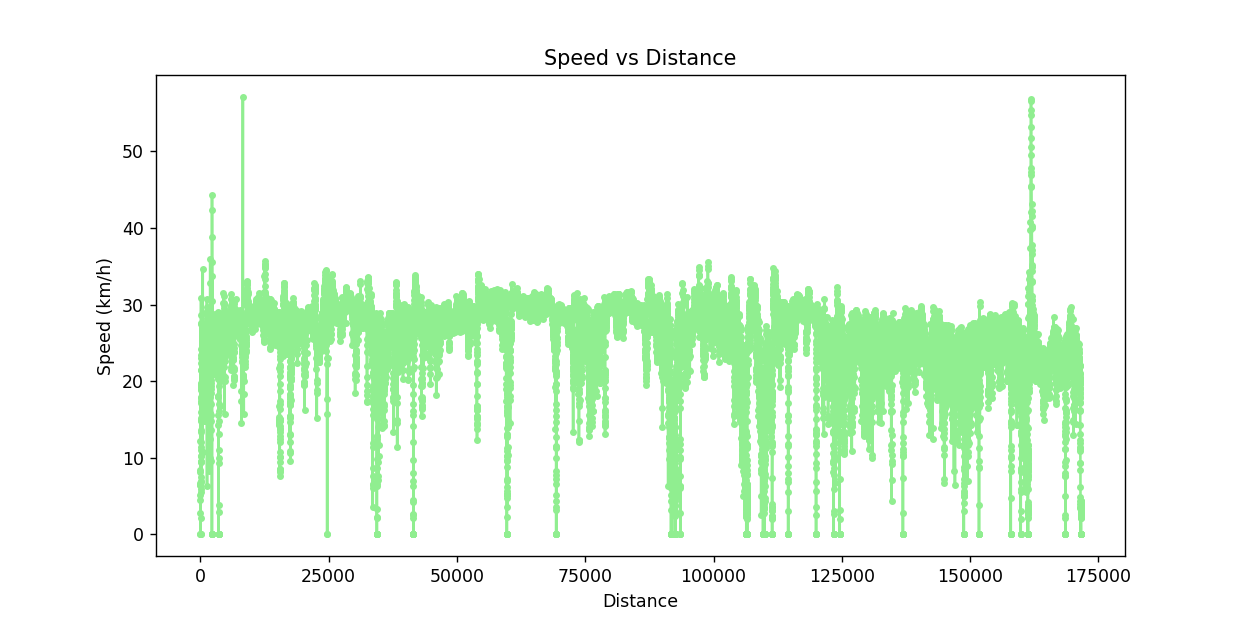

Text(0.5, 1.0, 'Speed vs Distance')

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(10,5))#use this to set size of figure

### Set the variables ####
x = fietsdata.distance #x-values: column distance
s = fietsdata.speed_kmh #y values: column speed

### Plot the scatter with labels and title ###
plt.plot(x,s,c='lightgreen', marker=".") #make the scatter
# scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, \*, plotnonfinite=False, data=None, \*\*kwargs)
plt.xlabel('Distance')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance')
#plt.legend() 

### 4b. Speed, heart rate, cadence and power

<IPython.core.display.Javascript object>


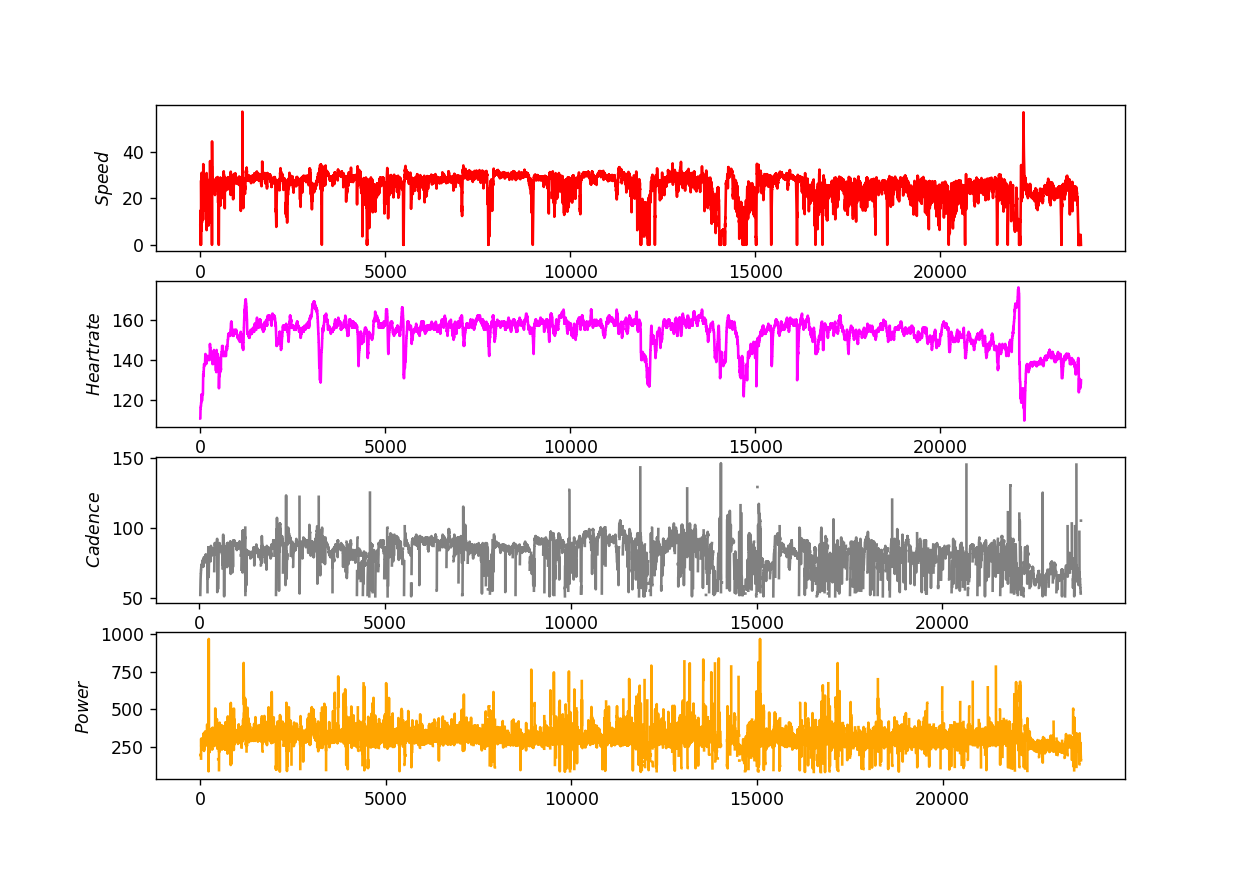

Text(0, 0.5, '$Power$')

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

######## write the data to a variable ###########

s = fietsdata.speed_kmh
h = fietsdata.heart_rate
c = fietsdata.cadence
p = fietsdata.power

####### make the subplots ##########
plt.subplot(4,1,1)
plt.plot(s, color='red', linewidth=1.5)
plt.ylabel(r'$Speed$') # y label

plt.subplot(4,1,2)
plt.plot(h, color='magenta', linewidth=1.5)
plt.ylabel(r'$Heartrate$') # y label

plt.subplot(4,1,3) 
plt.plot(c, color='grey', linewidth=1.5)
plt.ylabel(r'$Cadence$') # y label

plt.subplot(4,1,4)
plt.plot(p, color='orange', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

### 4c. Histogram of cadence, bpm and power

<IPython.core.display.Javascript object>


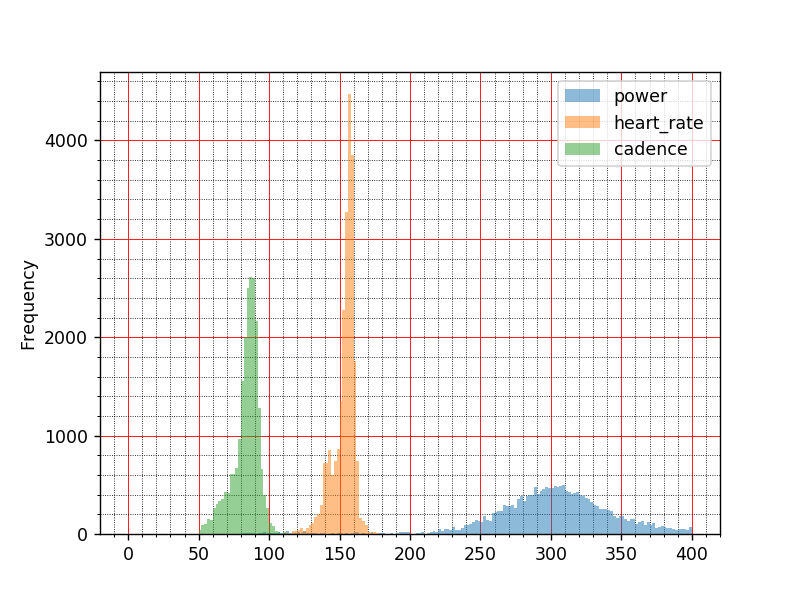

In [13]:
fig, ax = plt.subplots()
fietsdata[['power', 'heart_rate', 'cadence']].plot.hist(bins=200, alpha=0.5, range=(0, 400), ax=ax)
ax.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 4d. Speed vs Power

<IPython.core.display.Javascript object>


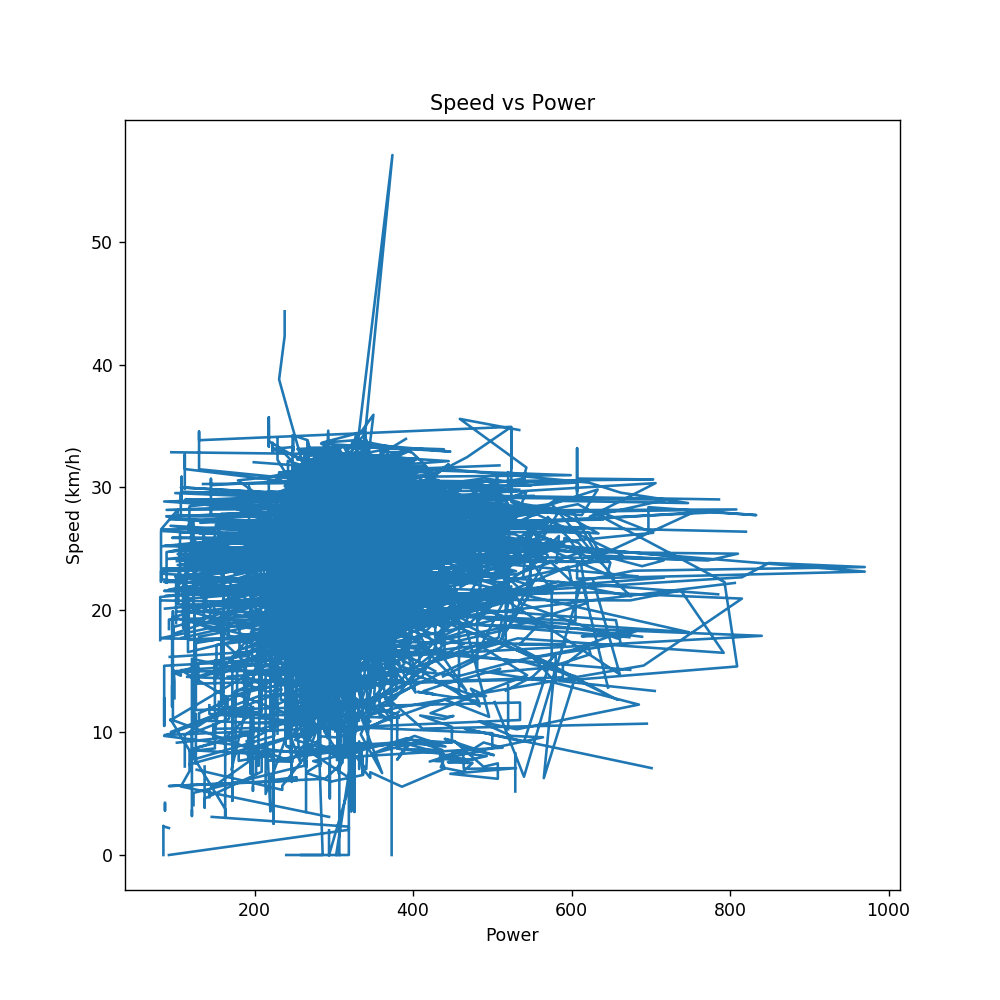

Text(0.5, 1.0, 'Speed vs Power')

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
# We use matplotlib to make a scatter of distance vs speed

plt.figure(figsize=(8,8))#use this to set size of figure

### Set the variables ####
s = fietsdata.speed_kmh #y values: column speed
p = fietsdata.power

### Plot the scatter with labels and title ###
plt.plot(p,s) #make the scatter
plt.xlabel('Power')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Power')
#plt.legend() 

## 5. Some more data analysis

### 5a. Average values

In [24]:
avg_speed= fietsdata["speed_kmh"].mean()
text_speed = "Your average speed was {:.1f} km/h."
print(text_speed.format(avg_speed))

avg_cadence = fietsdata['cadence'].mean()
text_cad = "Your average cadence was {:.0f}."
print(text_cad.format(avg_cadence))

avg_power = fietsdata['power'].mean()
text_power = "Your average power was {:.0f} watt."
print(text_power.format(avg_power))

avg_heart_rate = fietsdata['heart_rate'].mean()
text_heart_rate = "Your average heart was {:.0f} beats/minute."
print(text_heart_rate.format(avg_heart_rate))

avg_temp = fietsdata['temperature'].mean()
text_temp = "The average temperature was {:.0f} degrees Celsius."
print(text_temp.format(avg_temp))

Your average speed was 25.1 km/h.
Your average cadence was 83.
Your average power was 310 watt.
Your average heart was 153 beats/minute.
The average temperature was 19 degrees Celsius.


In [25]:
med_speed= fietsdata["speed_kmh"].median()
text_speed = "Your median speed was {:.1f} km/h."
print(text_speed.format(med_speed))

med_cadence = fietsdata['cadence'].median()
text_cad = "Your median cadence was {:.0f}."
print(text_cad.format(med_cadence))

med_power = fietsdata['power'].median()
text_power = "Your median power was {:.0f} watt."
print(text_power.format(med_power))

med_heart_rate = fietsdata['heart_rate'].median()
text_heart_rate = "Your median heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(med_heart_rate))

med_temp = fietsdata['temperature'].median()
text_temp = "The median temperature was {:.0f} degrees Celsius."
print(text_temp.format(med_temp))

Your median speed was 26.6 km/h.
Your median cadence was 85.
Your median power was 305 watt.
Your median heartrate was 155 beats/minute.
The median temperature was 20 degrees Celsius.


In [27]:
max_speed= fietsdata["speed_kmh"].max()
text_speed = "Your max speed was {:.1f} km/h."
print(text_speed.format(max_speed))

max_cadence= fietsdata["cadence"].max()
text_cadence = "Your max cadence was {:.1f}."
print(text_cadence.format(max_cadence))

max_power = fietsdata['power'].max()
text_power = "Your max power was {:.0f} watt."
print(text_power.format(max_power))

max_heart_rate = fietsdata['heart_rate'].max()
text_heart_rate = "Your max heartrate was {:.0f} beats/minute."
print(text_heart_rate.format(max_heart_rate))

max_temp = fietsdata['temperature'].max()
text_temp = "The max temperature was {:.0f} degrees Celsius."
print(text_temp.format(max_temp))

Your max speed was 57.1 km/h.
Your max cadence was 146.0.
Your max power was 970 watt.
Your max heartrate was 176 beats/minute.
The max temperature was 27 degrees Celsius.


In [28]:
import pandas as pd

# table from list
list0 = [' ', 'Speed', 'Cadence', 'Power', 'Heart rate', 'Temperature']
list1 = ["Average", avg_speed, avg_cadence, avg_power, avg_heart_rate, avg_temp]
list2 = ["Median", med_speed, med_cadence, med_power, med_heart_rate, med_temp]
list3 = ["Max", max_speed, '-', max_power, max_heart_rate, max_temp]

tabel = pd.DataFrame([list0, list1, list2, list3])

tabel.round(0) # round werkt hier niet. 

,0,1,2,3,4,5
0,,Speed,Cadence,Power,Heart rate,Temperature
1,Average,25.0584,83.2028,309.939,152.846,19.4435
2,Median,26.6472,85,305,155,20
3,Max,57.132,-,970,176,27


In [29]:
import pandas as pd

tabel2 = pd.DataFrame([ [' ', 'Speed', 'Cadence', 'Power', 'Heart rate', 'Temperature'],
                      ["Average", avg_speed, avg_cadence, avg_power, avg_heart_rate, avg_temp],
                      ["Median", med_speed, med_cadence, med_power, med_heart_rate, med_temp],
                      ["Max", max_speed, '-', max_power, max_heart_rate, max_temp],
                      ])
tabel2.round(1)

,0,1,2,3,4,5
0,,Speed,Cadence,Power,Heart rate,Temperature
1,Average,25.0584,83.2028,309.939,152.846,19.4435
2,Median,26.6472,85,305,155,20
3,Max,57.132,-,970,176,27


In [30]:
weight = 94 
power_profile = med_power / weight
print("Your power profile was "+ str(round(power_profile,2)) + ' W/kg')

Your power profile was 3.24 W/kg


### 5b. Calories burned based on power meter

In [31]:
# watt * tijd = 
# watt = 1 joule/seconde

# Som (alle powermetingen)= totaal vermogen geleverd aan fiets eenheid: joule / kilojoule
# total_energy = sum['power']

total_energy = fietsdata['power'].sum()

# convert watt to kcal = 1 kilojoule = 0.239 kilocalorie
energy_kcal = total_energy * 0.239 / 1000

# Efficiency body = 21%
energy_used = energy_kcal / 0.21
text = "You've burned {:.0f} kcal"
print(text.format(energy_used))

You've burned 7754 kcal


### 5.c Calories burned based on heartrate

In [32]:
#source: http://www.shapesense.com/fitness-exercise/calculators/heart-rate-based-calorie-burn-calculator.shtml
HR= avg_heart_rate # gemiddelde heartrate
W = 94 #gewicht
A = 44 #Age
T = 4.9
Calorie_burned_man = ((-55.0969 + (0.6309 * HR) + (0.1988 * W) + (0.2017 * A)) / 4.184) * 60 * T
text = "You've burned {:.0f} kcal"
print(text.format(Calorie_burned_man))

You've burned 4841 kcal


### 5d. Total duration

In [33]:
timetable = (fietsdata['timestamp'])
starttime= timetable.iloc[0]
endtime= timetable.iloc[-1]
#starttijd = timetable.iloc[1,0]
#print(starttijd

duration = endtime-starttime

print("Total duration was: "+ str(duration))

Total duration was: 0 days 07:48:44


## 6. Store the data in json format with date in filename

In [34]:
# Store the dataframe in a json
# source: https://datatofish.com/export-pandas-dataframe-json/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

import pandas as pd
import datetime

filename = datetime.datetime.now().strftime("%Y%m%d")+"fiets.json"
fietsdata.to_json(filename) # it creates a .json file in the astroplant_explorer/learning_stuff folder

#fietsdata.to_json(r'fietsdata.json')

# result: it works but json file is about 8x larger than .fit file.

### 7. Some more data analys: rolling, expanding etc

<IPython.core.display.Javascript object>


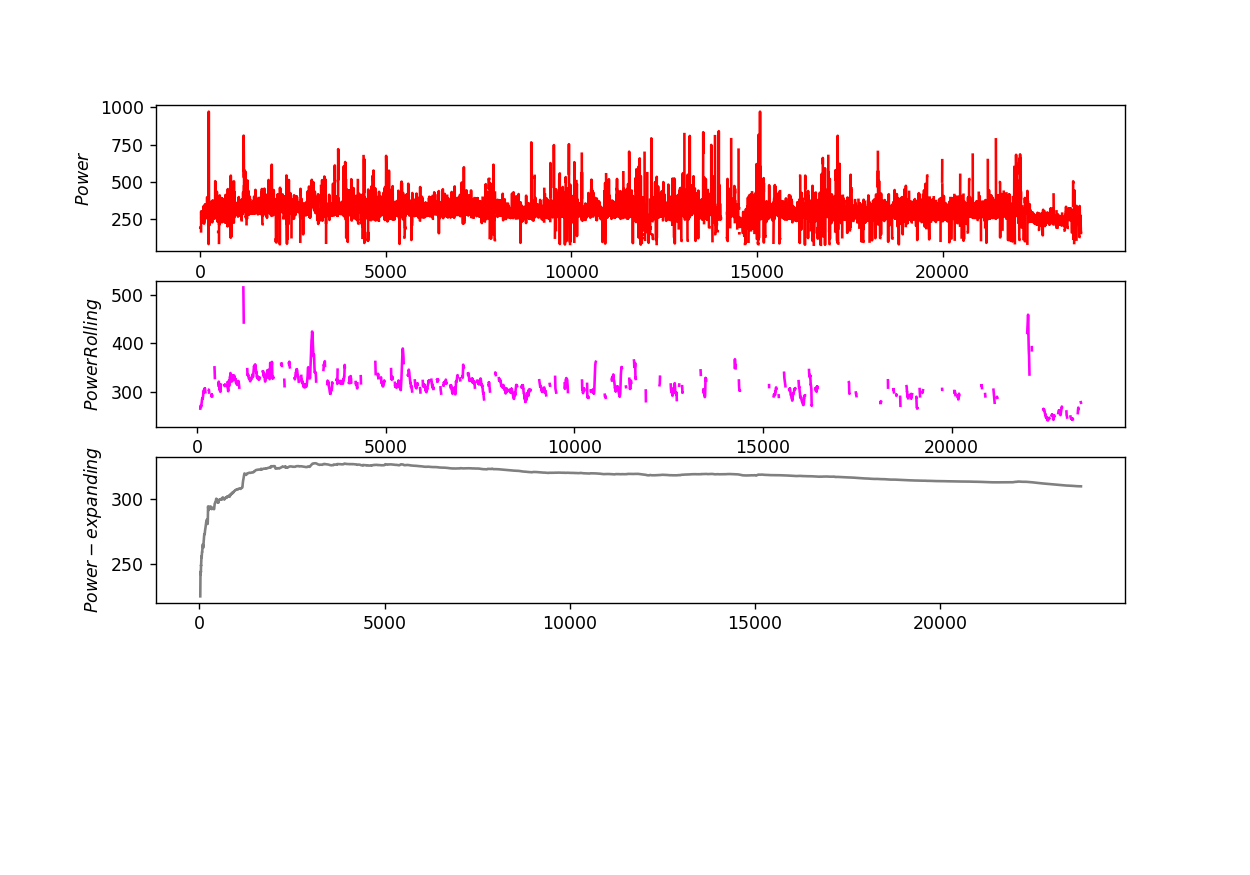

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))#use this to set size of figure

x = fietsdata.distance #x-values: column distance
p = fietsdata.power
p_roll = fietsdata.power.rolling(60).mean()
p_exp = fietsdata.power.expanding(7).mean()
#############
plt.subplot(4,1,1)
plt.plot(p, color='red', linewidth=1.5)
plt.ylabel(r'$Power$') # y label

plt.subplot(4,1,2)
plt.plot(p_roll, color='magenta', linewidth=1.5)
plt.ylabel(r'$Power Rolling$') # y label

plt.subplot(4,1,3) 
plt.plot(p_exp, color='grey', linewidth=1.5)
plt.ylabel(r'$Power - expanding$') # y label

#plt.subplot(4,1,4)
#plt.plot(p, color='orange', linewidth=1.5)
#plt.ylabel(r'$Power$') # y label

#plt.plot(x,p)
plt.show()

## Calculate bearing of my 